In [5]:
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [6]:
from google.colab import drive

drive.mount('/content/gdrive')

colab_path='/content/gdrive'
file_path = colab_path+'/MyDrive/Colab Notebooks/디지털사운드/9주차/02_AdjustAmplitude.wav'
y, sr = librosa.load(file_path, sr=None, duration=10) #sr(sampling rate): default 22050

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
ipd.Audio(y, rate=sr)

In [8]:
stft = librosa.stft(y, n_fft=1024, hop_length=512)
spec = np.abs(stft)
spectrogram = librosa.amplitude_to_db(spec, ref=np.max)

s_df = pd.DataFrame(spectrogram)
s_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937
0,-59.824799,-60.930317,-66.829453,-69.283386,-58.622704,-64.762589,-58.170143,-50.075905,-55.918789,-52.190109,-57.022346,-73.757141,-69.084824,-64.770172,-62.609512,-54.758156,-80.000000,-54.144482,-63.410126,-52.390488,-55.510582,-58.508453,-63.038338,-64.431778,-75.721359,-57.398483,-64.542175,-80.000000,-59.946632,-69.097717,-61.502556,-77.837051,-64.883659,-62.751080,-55.835587,-73.665100,-54.855373,-51.019283,-42.911453,-56.534306,...,-38.625198,-51.121449,-54.362228,-43.594734,-66.471855,-52.856453,-48.235424,-48.555630,-48.927708,-51.614780,-57.248375,-43.740028,-54.032448,-48.043484,-47.185463,-49.254452,-37.416164,-57.114578,-54.808971,-49.502720,-47.589931,-42.837543,-80.000000,-41.086872,-45.169594,-48.670116,-42.273308,-45.062607,-37.376984,-36.643433,-30.891462,-29.095497,-32.965874,-34.398533,-52.705296,-45.566650,-48.889030,-46.619034,-54.063538,-34.854321
1,-53.982132,-53.007114,-50.497372,-59.022846,-56.336475,-46.604668,-50.313423,-47.447849,-47.439621,-45.242428,-50.004368,-46.089359,-50.773155,-53.734146,-52.323669,-61.239510,-52.677834,-47.637985,-46.247169,-55.189064,-48.405506,-51.697227,-54.413101,-56.905209,-64.705765,-46.809227,-58.375954,-54.414288,-50.132385,-54.346676,-49.188690,-62.524723,-62.453335,-53.508514,-45.254646,-50.264862,-48.838497,-44.902992,-43.830391,-48.085781,...,-46.139961,-56.376163,-36.482292,-30.250460,-29.938787,-41.448589,-39.081383,-38.362339,-45.972687,-45.289993,-52.493061,-39.923019,-44.205818,-35.717163,-31.140131,-31.381901,-38.458908,-32.860405,-32.478195,-30.821419,-29.742603,-29.376568,-29.068878,-29.420980,-28.997971,-28.173546,-29.275278,-28.730227,-28.502472,-26.792267,-24.838932,-38.618263,-26.765270,-27.766804,-26.239843,-44.660362,-27.381817,-27.778397,-30.543821,-36.581177
2,-45.197460,-47.270657,-44.333931,-51.004112,-54.917847,-43.497215,-45.403847,-52.956764,-45.335175,-43.022354,-41.718140,-40.713089,-44.966415,-48.006798,-44.939617,-50.088104,-47.053940,-45.441162,-42.761337,-43.186897,-41.512878,-44.573242,-48.845715,-60.060051,-57.669079,-43.967705,-55.069408,-49.163471,-47.799316,-55.377411,-45.469822,-51.699875,-57.027859,-46.725780,-43.511524,-57.242527,-49.813179,-43.652302,-46.583527,-45.975075,...,-21.319563,-22.009422,-20.183218,-18.751421,-22.190256,-36.906288,-37.216358,-33.336109,-41.802353,-43.844597,-47.841995,-39.892933,-36.839561,-21.408516,-14.884356,-14.250086,-14.645504,-15.044012,-15.281485,-15.215311,-15.071472,-15.635536,-15.819515,-16.678909,-16.360065,-16.416319,-17.514318,-18.867971,-17.606846,-19.562092,-17.209648,-18.654400,-18.765535,-19.907909,-19.160416,-20.341961,-18.297487,-19.121519,-20.354839,-18.956816
3,-46.443474,-58.340046,-46.337440,-52.783867,-54.409672,-46.589737,-46.655342,-49.272636,-62.836082,-52.045071,-46.815262,-47.274677,-46.212105,-51.668530,-46.644135,-52.173679,-61.704418,-50.073189,-45.315887,-42.779026,-42.242306,-48.173489,-51.801849,-60.622059,-49.369015,-49.218338,-52.806290,-52.673515,-54.587650,-50.780403,-48.922066,-49.191849,-55.767677,-50.323803,-48.113331,-66.801880,-56.510052,-46.570774,-53.781429,-49.118935,...,-18.263275,-17.998199,-18.468559,-20.870079,-24.151979,-42.502865,-42.758202,-36.097248,-45.191162,-47.569542,-47.532104,-44.405334,-54.883636,-17.399694,-13.082472,-12.241629,-12.396454,-12.217726,-13.167381,-14.782356,-14.618496,-14.795692,-16.098087,-16.714853,-17.155674,-19.240602,-20.033699,-19.984377,-14.806231,-23.583471,-19.305489,-20.490604,-19.957405,-19.066418,-20.896145,-21.901754,-23.529480,-25.256159,-22.878197,-18.178797
4,-49.156666,-54.800148,-51.913021,-51.366295,-53.384071,-49.863602,-48.722958,-49.176796,-48.765430,-61.885353,-57.704929,-53.606113,-53.850235,-59.015106,-59.725857,-57.789253,-53

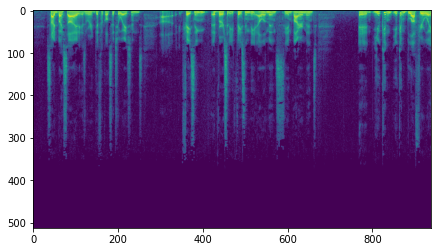

In [9]:
plt.figure(figsize=(15,4))
plt.imshow(spectrogram)

In [10]:
#pd.options.display.float_format = '{:.5f}'.format # 실수표현식
#pd.reset_option('display.float_format') # reset
S_dB = librosa.feature.melspectrogram(y, sr=sr)
S_dB = librosa.power_to_db(S_dB, ref=np.max)
S_dB = pd.DataFrame(S_dB) #pandas table로 변환
S_dB

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937
0,-66.645142,-66.134720,-66.281754,-67.326019,-56.870163,-57.050426,-58.455971,-51.699444,-55.179527,-57.822781,-59.046696,-62.335484,-60.786739,-60.418823,-63.800503,-57.908680,-61.586288,-58.316494,-58.263329,-55.658020,-56.681438,-58.252678,-63.941216,-60.689926,-61.936142,-54.930176,-55.819881,-64.205933,-60.012600,-61.009594,-58.824673,-62.129757,-67.234314,-59.036076,-53.386086,-53.733604,-53.789108,-48.862820,-48.001404,-52.659252,...,-45.984890,-50.897709,-52.616257,-50.152390,-51.054115,-49.493286,-48.946560,-51.602283,-50.213516,-51.694168,-53.177017,-47.712208,-48.101677,-54.757610,-48.506485,-51.534996,-48.116848,-47.766609,-47.162792,-54.350777,-51.877991,-54.437561,-51.134483,-51.768513,-51.284279,-53.122887,-49.157475,-45.659901,-38.436619,-34.902187,-32.960594,-33.353199,-34.753693,-35.749962,-36.478127,-36.342361,-40.514732,-45.361904,-55.631622,-40.876007
1,-52.415539,-52.677475,-52.635872,-56.562981,-53.354347,-48.783432,-49.201050,-48.749687,-48.049789,-47.020981,-48.809002,-48.728554,-51.806091,-55.551003,-55.260681,-57.684113,-53.089645,-48.454021,-47.312462,-53.525417,-55.271339,-56.444080,-53.585907,-57.798347,-55.871269,-49.984444,-54.199169,-54.317802,-51.866676,-51.773338,-52.497730,-60.317219,-61.500435,-51.702072,-47.485348,-50.167168,-48.145126,-47.954277,-49.007607,-47.473866,...,-44.261490,-45.192585,-39.670296,-34.508762,-32.460430,-36.363613,-39.651855,-39.965843,-44.119492,-48.079666,-46.283722,-41.886612,-45.822990,-38.495476,-37.508972,-38.136982,-37.034523,-39.428265,-38.336815,-36.420589,-35.956657,-35.972466,-35.585945,-35.773815,-34.441959,-33.703148,-34.100380,-34.228924,-31.162390,-29.742905,-29.095364,-31.900837,-31.969635,-35.846989,-32.097683,-33.986572,-31.862179,-33.121078,-35.045368,-37.279327
2,-47.114841,-46.547218,-46.679703,-51.804657,-51.856941,-46.093601,-47.112343,-54.374924,-47.453392,-44.137775,-42.445320,-42.140102,-46.056572,-49.243866,-47.362152,-49.285118,-47.461647,-47.873501,-44.765800,-43.602840,-44.343983,-46.001675,-50.234032,-60.110424,-52.956844,-47.464119,-51.139000,-50.905991,-51.188766,-53.562202,-48.285572,-52.730392,-56.935383,-46.927479,-46.581078,-55.832893,-52.169426,-48.359543,-47.421883,-48.867237,...,-25.286436,-26.202427,-23.368530,-21.184235,-23.409666,-33.018089,-38.611240,-35.657791,-40.597420,-45.575417,-48.288414,-42.519646,-32.685326,-23.352764,-18.697784,-17.741066,-18.345118,-18.671268,-18.782948,-18.174252,-17.774973,-18.063395,-18.241838,-18.606476,-18.344229,-18.413450,-19.099026,-19.954460,-19.486944,-20.209538,-19.843796,-19.451321,-20.841496,-21.919832,-20.752861,-21.102619,-20.326668,-20.578159,-21.407980,-21.186510
3,-53.108749,-52.888451,-49.972420,-55.245399,-54.893784,-53.294579,-55.592373,-56.094147,-54.422363,-56.219494,-49.242626,-47.729599,-47.638985,-49.774540,-49.545395,-50.802589,-54.626133,-53.342995,-48.806503,-45.253227,-43.998405,-46.925728,-55.270317,-62.154224,-51.717220,-50.881218,-54.904434,-57.621918,-55.756565,-53.021648,-51.703796,-51.456924,-54.784966,-50.191582,-49.836342,-59.296062,-56.974380,-50.679535,-51.499382,-51.268436,...,-19.592289,-19.364786,-19.345751,-20.431732,-24.363697,-35.864182,-39.698238,-39.681149,-51.994400,-56.176571,-55.734463,-53.373753,-30.674280,-18.580481,-14.270411,-13.195462,-13.080707,-13.559498,-14.173520,-14.742186,-15.136589,-15.630477,-16.405420,-17.156433,-17.648884,-18.329033,-19.590185,-20.383698,-19.385029,-21.464836,-19.947361,-20.084324,-20.400112,-21.070326,-21.946402,-21.438051,-21.882092,-22.903057,-23.352621,-19.273207
4,-54.797169,-53.768929,-52.437168,-53.397842,-51.791718,-52.237808,-51.617950,-50.942787,-55.172146,-59.026814,-58.790920,-62.264423,-57.274075,-57.737495,-56.977608,-59.119808,-56

In [11]:
mMscaler = MinMaxScaler()
sdscaler = StandardScaler()

#표준화와 정규화
S_dB = sdscaler.fit_transform(S_dB)
S_dB = mMscaler.fit_transform(S_dB)
S_dB = pd.DataFrame(S_dB)
S_dB

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937
0,0.406106,0.414473,0.411708,0.449506,0.785975,0.676851,0.655079,0.905609,0.762613,0.618401,0.557941,0.466576,0.563681,0.630060,0.496341,0.719238,0.565908,0.674941,0.616920,0.668788,0.647709,0.639659,0.527518,0.665500,0.617768,0.770529,0.837813,0.542863,0.693736,0.672783,0.667688,0.626080,0.506273,0.633877,0.748494,0.647963,0.654258,0.765826,0.727803,0.654768,...,0.445852,0.404926,0.437865,0.501066,0.511499,0.649329,0.750287,0.640422,0.752030,0.692510,0.714637,0.799715,0.641352,0.410983,0.455794,0.393051,0.435264,0.423851,0.426206,0.339673,0.381692,0.348851,0.400432,0.399396,0.403621,0.378486,0.439251,0.484848,0.581366,0.634868,0.646916,0.619502,0.592981,0.591761,0.606310,0.615264,0.560930,0.509090,0.359019,0.584630
1,0.838812,0.816749,0.821245,0.831237,0.905446,0.920669,0.936490,1.000000,0.981676,0.919603,0.830549,0.825978,0.827156,0.786691,0.757995,0.726550,0.827035,0.981930,0.927722,0.727380,0.686877,0.692855,0.867681,0.765155,0.825182,0.922537,0.893969,0.882731,0.976471,1.000000,0.867185,0.689582,0.733672,0.855633,0.914447,0.735943,0.795139,0.788172,0.704917,0.778950,...,0.468441,0.484307,0.644871,0.763682,0.840065,0.928791,0.974858,0.902845,0.905888,0.780939,0.898293,0.944005,0.687167,0.675755,0.614957,0.578054,0.586558,0.533495,0.540761,0.577122,0.597787,0.600845,0.616126,0.625676,0.640352,0.651956,0.653690,0.646243,0.683114,0.707498,0.700073,0.638791,0.629467,0.590464,0.667335,0.648464,0.683849,0.688998,0.662316,0.638375
2,1.000000,1.000000,1.000000,1.000000,0.956330,1.000000,1.000000,0.819994,1.000000,1.000000,1.000000,1.000000,0.995836,0.989634,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.990401,1.000000,0.977788,0.685472,0.924852,1.000000,1.000000,1.000000,1.000000,0.936625,1.000000,0.955384,0.914717,1.000000,0.939879,0.596176,0.694688,0.778205,0.740984,0.745581,...,0.717156,0.748534,0.905535,0.987367,1.000000,1.000000,1.000000,1.000000,0.994811,0.842206,0.844883,0.928326,0.951315,0.922300,0.887205,0.859685,0.841703,0.806438,0.794558,0.818758,0.844561,0.845251,0.856729,0.868546,0.866617,0.867267,0.867335,0.847784,0.846424,0.841705,0.827306,0.804129,0.775309,0.776713,0.825381,0.830037,0.847723,0.873346,0.863235,0.878850
3,0.817732,0.810442,0.901180,0.877968,0.853135,0.787622,0.742152,0.764980,0.785877,0.663107,0.819002,0.852364,0.949411,0.972559,0.933107,0.950595,0.779814,0.829751,0.885319,0.954656,1.000000,0.972821,0.812350,0.615034,0.967247,0.894974,0.869532,0.769165,0.841458,0.955775,0.892219,1.000000,1.000000,0.901305,0.848327,0.510743,0.574750,0.721144,0.648242,0.688076,...,0.791792,0.843672,0.969860,1.000000,0.983142,0.939422,0.973737,0.909266,0.707067,0.582846,0.646500,0.659488,0.991749,1.000000,0.951280,0.922452,0.913572,0.873655,0.854385,0.864209,0.880371,0.878453,0.882205,0.889060,0.876391,0.868455,0.860340,0.841724,0.847850,0.824033,0.825882,0.795722,0.781093,0.788074,0.808754,0.825310,0.825627,0.839176,0.834585,0.907441
4,0.766389,0.784122,0.827208,0.943495,0.958546,0.818789,0.863000,0.929821,0.762840,0.584827,0.564752,0.468453,0.666736,0.716336,0.705389,0.679807,0.708293,0.808259,0.765836,0.657637,0.842221,0.859868,0.705777,0.783844,0.930611,0.745974,0.455459,0.550668,0.799047,0.859870,0.579895,0.832943,0.832222,0.739458,0.718136,0.522894,0.592043,0.625605,0.492911,0.515576,...,0.739541,0.802271,0.887123,0.856287,0.886279,0.807967,0.814029,0.833851,0.763990,0.654173,0.858499,0.804107,1.000000,0.978621,0.885936,0.849586,0.850520,0.809556,0.783988,0.771714,0.775894,0.768896,0.759789,0.755611,0.734957,0.711316,0.704006,0.708381,0.781899,0.742696,0.707671,0.632964,0.649194,0.669164,0.668323,0.680758,0.675871,0.688129,0.699148,0.885156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [12]:
S_dB = S_dB*255
#1ch 이미지 만들기 > rgb 중 하나만 256

In [13]:
S_dB

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937
0,103.557007,105.690659,104.985649,114.624084,200.423721,172.596970,167.045273,230.930237,194.466354,157.692139,142.275009,118.976852,143.738571,160.665268,126.566910,183.405762,144.306534,172.110062,157.314514,170.540894,165.165833,163.112930,134.517075,169.702438,157.530914,196.484787,213.642288,138.430130,176.902771,171.559555,170.260315,159.650345,129.099564,161.638733,190.865891,165.230606,166.835861,195.285736,185.589798,166.965805,...,113.692276,103.256157,111.655624,127.771729,130.432190,165.578888,191.323135,163.307556,191.767593,176.589935,182.232483,203.927322,163.544647,104.800720,116.227524,100.228020,110.992294,108.081947,108.682472,86.616501,97.331337,88.957092,102.110107,101.846001,102.923271,96.513832,112.009018,123.636368,148.248413,161.891281,164.963501,157.973129,151.210068,150.899063,154.609100,156.892410,143.037231,129.817856,91.549797,149.080658
1,213.897034,208.270996,209.417480,211.965515,230.888840,234.770584,238.804871,255.000000,250.327271,234.498840,211.789963,210.624405,210.924774,200.606155,193.288651,185.270157,210.893906,250.392166,236.569061,185.482010,175.153580,176.678085,221.258759,195.114456,210.421310,235.246964,227.962021,225.096512,249.000031,255.000000,221.132111,175.843323,187.086365,218.186295,233.183960,187.665527,202.760559,200.983917,179.753876,198.632187,...,119.452576,123.498177,164.442032,194.738998,214.216629,236.841766,248.588684,230.225571,231.001373,199.139511,229.064774,240.721359,175.227615,172.317429,156.814087,147.403717,149.572311,136.041290,137.894119,147.166107,152.435669,153.215485,157.112167,159.547394,163.289734,166.248764,166.690994,164.791901,174.194153,180.411972,178.518555,162.891663,160.514206,150.568192,170.170395,165.358398,174.381500,175.694458,168.890503,162.785675
2,254.999985,255.000000,255.000000,255.000000,243.864105,255.000000,255.000000,209.098541,254.999985,255.000000,254.999969,255.000000,253.938156,252.356766,254.999969,255.000000,255.000000,254.999985,254.999985,255.000000,252.552261,254.999985,249.335892,174.795273,235.837372,255.000000,255.000000,255.000000,255.000031,238.839386,255.000000,243.623001,233.252792,255.000000,239.669067,152.024887,177.145340,198.442184,188.950974,190.123077,...,182.874878,190.876068,230.911545,251.778687,255.000031,255.000000,255.000000,255.000000,253.676727,214.762634,215.445129,236.723160,242.585220,235.186554,226.237198,219.219696,214.634277,205.641678,202.612244,208.783325,215.363174,215.538940,218.465927,221.479111,220.987442,221.153000,221.170532,216.184967,215.838181,214.634674,210.963089,205.052963,197.703690,198.061813,210.472260,211.659454,216.169434,222.703247,220.124939,224.106827
3,208.521698,206.662796,229.800858,223.881775,217.549362,200.843567,189.248657,195.069794,200.398666,169.092392,208.845612,217.352722,242.099777,248.002533,237.942261,242.401703,198.852600,211.586563,225.756271,243.437317,254.999969,248.069244,207.149231,156.833755,246.647873,228.218491,221.730682,196.136993,214.571747,243.722748,227.515778,255.000000,255.000000,229.832672,216.323441,130.239578,146.561157,183.891678,165.301743,175.459305,...,201.907028,215.136276,247.314194,255.000000,250.701096,239.552490,248.302902,231.862762,180.302139,148.625839,164.857468,168.169434,252.895981,255.000000,242.576523,235.225220,232.960846,222.781982,217.868240,220.373276,224.494720,224.005463,224.962158,226.710190,223.479691,221.456146,219.386826,214.639557,216.201706,210.128418,210.599884,202.909241,199.178757,200.958755,206.232269,210.454010,210.534851,213.989914,212.819107,231.397400
4,195.429260,199.951172,210.938156,240.591171,244.429276,208.791260,220.065002,237.104477,194.524185,149.130814,144.011749,119.455467,170.017593,182.665802,179.874298,173.350769,180.6146

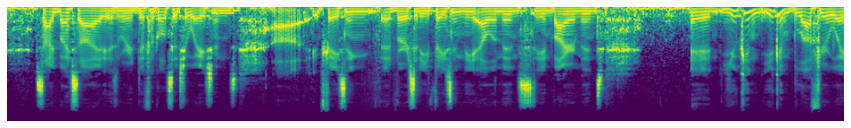

In [14]:
#pandas를 다시 행렬구조 array로 바꿈.
S_dB = np.array(S_dB)

plt.figure(figsize=(15,4))
#librosa.display.specshow(S_dB, sr=sr, y_axis='mel', fmax=24000, x_axis='time');
#plt.title('Mel Spectrogram');
#plt.colorbar(format='%+2.0f');
plt.axis(False)
plt.imshow(S_dB) #numpy 값을 이미지화 시켜주는 함수 / cmap을 넣으면 색깔 바꿀 수 잇음.
plt.savefig("test") #png파일로 저장.